In [231]:
import pandas as pd

import numpy as np
import pydot

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from graphviz import Digraph
from mpl_toolkits.axes_grid1 import AxesGrid

In [159]:
def graph(df, eng = 'dot'):
    edge_style = ""
    g = Digraph(engine=eng)
    for k, row in enumerate(df.index):
        if any(df.iloc[k]) or any(df[row]):
            g.node(str(k),row, shape='oval', fontsize='10', width='0') 

    for j, col in enumerate(df.columns):
        for i, row in enumerate(df[col]):
            
            if(row):
                if row == 1:
                    edge_style = "solid"     
                elif row == -1:
                    edge_style="dashed"
                elif row == -2:
                    edge_style = "dotted"

                g.edge(str(i), str(j), label='',style= edge_style, weight = "5")  
    return g 

In [114]:
def generate_conf_df(df, df_ref):
    confMatrix = np.zeros([2,2], dtype=int)
    df_con_graph = df
    
    for col, col_ref in zip(df.columns, df_ref.columns):
        for row, row_ref, index in zip(df[col], df_ref[col_ref], np.arange(0,len(df.columns))):
            if(df[col].index[index] != col):
                if row != row_ref and row == 1:
                    df_con_graph[col][index] = -1 #false positve
                elif row != row_ref and row == 0:
                    df_con_graph[col][index] = -2    #faqualificacao/normal/grafos/normallse negative
    return df_con_graph

In [115]:
col_labels = ['xmeas%02d_low' % x for x in [1,2,3,8,9,21]]+ ['xmeas%02d_high' % x for x in [1,2,3,8,9,21]] 
df_mat = np.zeros([12,12], dtype=int)

ref_df = pd.DataFrame(df_mat, columns = col_labels, index=col_labels)
ref_df.loc['xmeas01_low'][['xmeas21_high', 'xmeas09_low']] = [1,1]
ref_df.loc['xmeas09_low']['xmeas21_high'] = 1

ref_df.loc['xmeas01_high'][['xmeas21_low', 'xmeas09_high']] = [1,1]
ref_df.loc['xmeas09_high']['xmeas21_low'] = 1

In [228]:
cen_normal = "cenarios/cen_nova_versao/normal/"
cen_media2 = "cenarios/cen_nova_versao/media2/"
cen_media5 = "cenarios/cen_nova_versao/media5/"

cen_normal_rate = cen_normal+"rates/"
cen_media2_rate = cen_media2+"rates/"
cen_media5_rate = cen_media5+"rates/"

graph_normal = "qualificacao/normal/grafos/"
graph_mean2 = "qualificacao/mean2/grafos/"
graph_mean5 = "qualificacao/mean5/grafos/"


In [428]:
def draw_graphs(cen, df):
    all_settings = ['k%d_l%d_h%d' %(x,y,z) for z in [1,2,3] for x,y in zip([1,2,3,4,5,6],[1,2,3,4,5,6])]
    paths_graph = [graph_normal, graph_mean2, graph_mean5]
    count = 0
    index_path = 0
    for sett in all_settings:
        graph_df = generate_conf_df(pd.read_csv(cen+sett+"_sel_corrs.csv", index_col=0), df)
        graph(graph_df).save(paths_graph[index_path]+sett+".dot")
        (graph_,) = pydot.graph_from_dot_file(paths_graph[index_path]+sett+".dot")
        graph_.write_png(paths_graph[index_path]+'dot_graph'+sett+".png")
        count +=1
        
        if count > 5:
            count =0
            index_path +=1
            
    

In [491]:
def read_graph_imgs(cen_graph_path):
    img_by_h = []
    imgs  = []

    all_settings = ['k%d_l%d_h%d' %(x,y,z) for z in [3] for x,y in zip([1,2,3,4,5,6],[1,2,3,4,5,6])]
    paths_graph = [graph_normal, graph_mean2, graph_mean5]
    count = 0
    index_path = 0
    for sett in all_settings:
        imgs.append(mpimg.imread(paths_graph[index_path]+'dot_graph'+sett+".png"))
        count +=1

        if count > 5:
            count =0
            index_path +=1
            img_by_h.append(imgs)
            imgs = []
    return img_by_h
    

In [487]:
def disp_grid_graphs(graphs_list):
    plot_loc = 321
    legends = list(string.ascii_lowercase)
    for graphs in graphs_list:
        plt.figure(figsize=(40,50))
        for i, graph in enumerate(graphs):
            plt.subplot(plot_loc+i)
            plt.title('Figura (' + legends[i] +")", fontsize=40)
            plt.imshow(graph, aspect="equal")
            plt.axis('off')
            
        plt.show()

In [456]:
#draw_graphs(cen_normal, ref_df)

In [426]:
normal_graphs = read_graph_imgs(cen_normal)
mean2_graphs = read_graph_imgs(cen_media2)
mean5_graphs = read_graph_imgs(cen_media5)

In [253]:
#normal_graphs[0][0]

In [460]:
plt.suptitle?

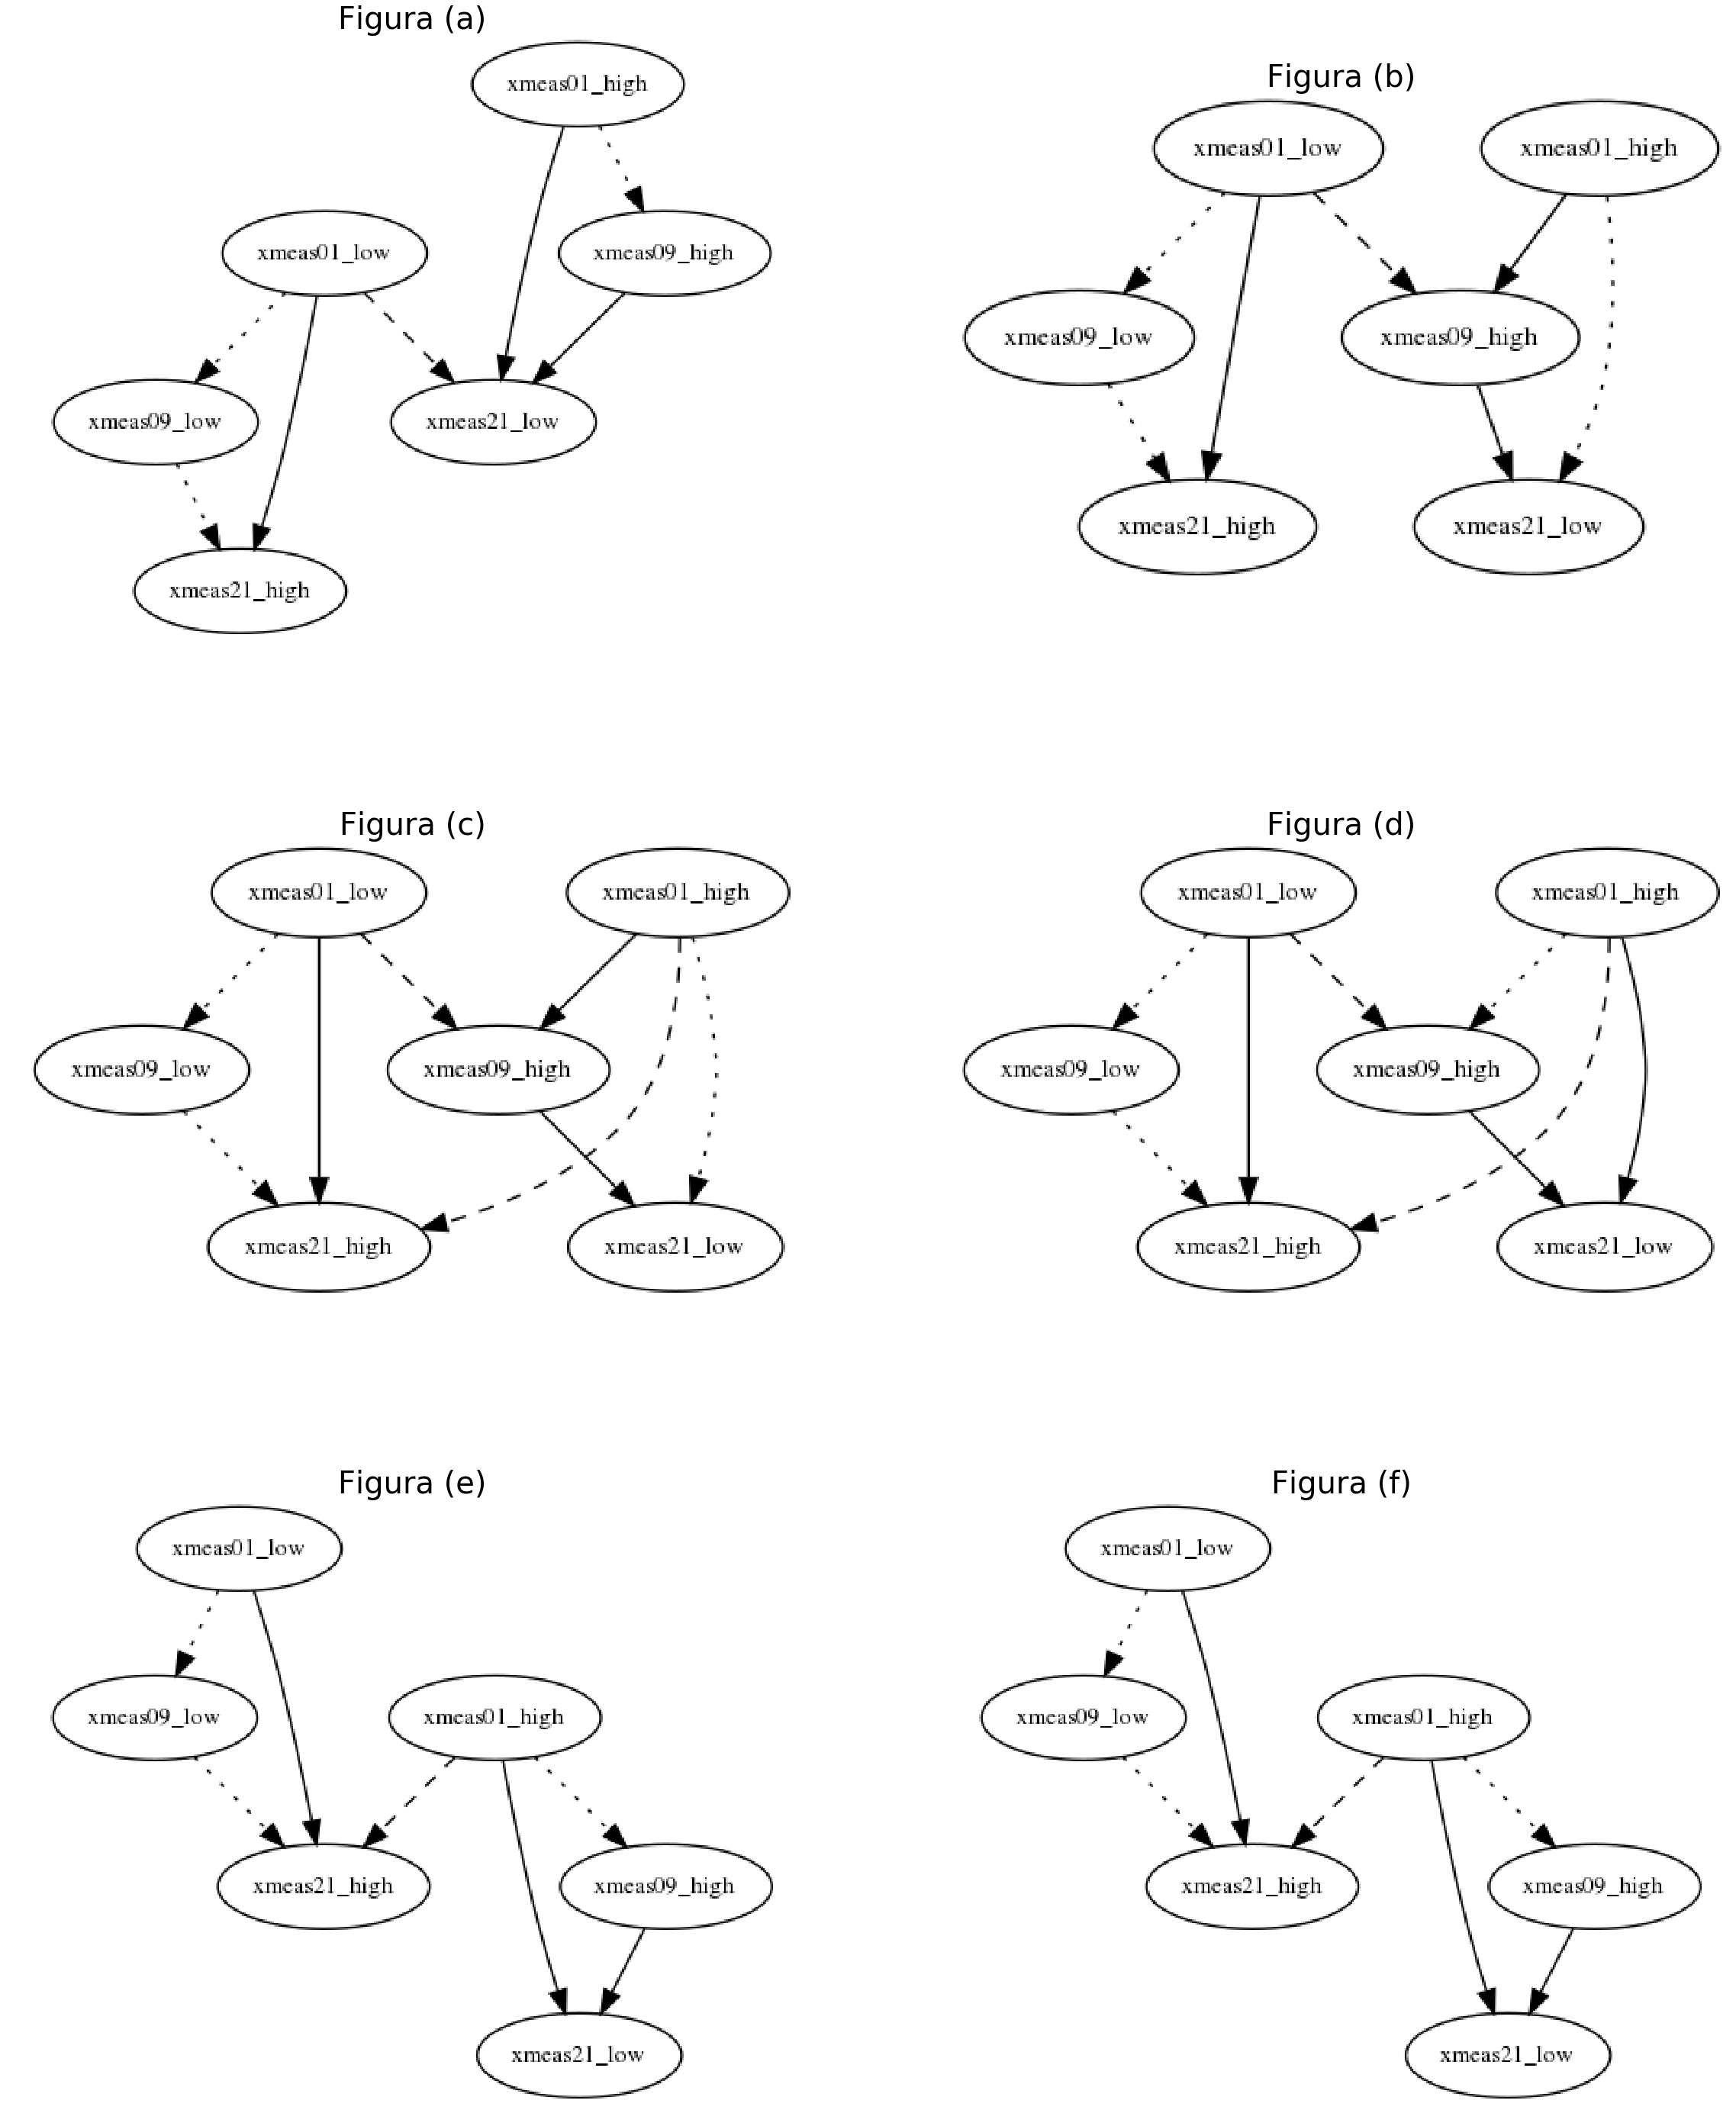

In [492]:
disp_grid_graphs(normal_graphs)